![image](./images/ssg.png)

# Data Preview
<hr>

The data required quite a bit of tidying up, and I stripped identifying information. That work is contained in a python file that I have chosen to keep local. Below you'll see that I'm reading in csv files. Each csv file represents a "collection", which is a smaller, representative sample of many different types of furniture. I do most of the work in this notebook with the first file, program_1.csv. Other files are commented out to avoid crashing the kernel.

In [1]:
#bring in relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import tqdm
from sklearn.decomposition import PCA, SparsePCA
import plotly.express as px
from functions import *
from sklearn.decomposition import IncrementalPCA
from scipy import sparse
import re, seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import xgboost
from sklearn.model_selection import RepeatedKFold
import string
sns.set_theme(style="ticks")

In [2]:
dtype_dict = {'model_name':object, 'option':object, 'piece_id':object, 'piece_description':object,
       'piece_category':object, 'type':object, 'asin':int, 'm_x': int, 'm_y': int, 'm_xy':int, 'half':int, 'dysp':int,
       'addp':int, 'storage_area':object,'Type':object,
       'Num_Notch':int, 'Area':float, 'Perimeter':float, 'Internals':int, 'Points':int, 'Num_Sizes':object,
       'Num_Breaks':int, 'Base_Size':object, 'smallest':object, 'largest':object,
       'pc_type':object, 'labels':object}

#read in datasets
df1 = pd.read_csv('program_1.csv',dtype=dtype_dict)
# df2 = pd.read_csv('program_2.csv',dtype=dtype_dict)
# df3 = pd.read_csv('program_3.csv',dtype=dtype_dict)
# df4 = pd.read_csv('program_4.csv',dtype=dtype_dict)
# df5 = pd.read_csv('program_5.csv',dtype=dtype_dict)
# df6 = pd.read_csv('program_6.csv',dtype=dtype_dict)

In [3]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
# df2.drop('Unnamed: 0',axis=1,inplace=True)
# df3.drop('Unnamed: 0',axis=1,inplace=True)
# df4.drop('Unnamed: 0',axis=1,inplace=True)
# df5.drop('Unnamed: 0',axis=1,inplace=True)
# df6.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# all_dfs = [df1,df2,df3,df4,df5,df6]

In [5]:
df1.head()

model_name option piece_id piece_description piece_category type  asin  m_x  \
0     [kinqZ  KKqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
1     [kinqZ  KKqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
2     [kinqZ  KKqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
3     [kinqZ  KVqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
4     [kinqZ  KVqN[    YFXQI         RECTANGLE          DWELT    0     4    0   

   m_y  m_xy  ...  Perimeter  Internals  Points Num_Sizes Num_Breaks  \
0    0     0  ...     112.59          3       4         1          0   
1    0     0  ...     112.50          3       4         1          0   
2    0     0  ...     113.00          3       4         1          0   
3    0     0  ...     112.59          3       4         1          0   
4    0     0  ...     112.50          3       4         1          0   

   Base_Size  smallest  largest  pc_type  labels  
0          1         1        1      0.0    WELT  
1          1         1        1      0.0    WELT  
2          1         1        1      0.0    WELT  
3          1         1        1      0.0    WELT  
4          1         1        1      0.0    WELT  

[5 rows x 27 columns]

In [6]:
df1.shape

(496637, 27)

In [7]:
df1.model_name.nunique()

1269

In [8]:
df1.piece_id.nunique()

70240

In [9]:
print('Min Area:',df1.Area.min())
print('Max Area:',df1.Area.max())
print('Min Perimeter:',df1.Perimeter.min())
print('Max Perimeter:',df1.Perimeter.max())
print('Min # of Internal Lines:',df1.Internals.min())
print('Max # of Internal Lines:',df1.Internals.max())
print('Min # of Points:',df1.Points.min())
print('Max # of Points:',df1.Points.max())

Min Area: 5.13
Max Area: 16502.72
Min Perimeter: 10.35
Max Perimeter: 489.13
Min # of Internal Lines: 1
Max # of Internal Lines: 183
Min # of Points: 3
Max # of Points: 470


In [10]:
df1.columns

Index(['model_name', 'option', 'piece_id', 'piece_description',
       'piece_category', 'type', 'asin', 'm_x', 'm_y', 'm_xy', 'half', 'dysp',
       'addp', 'storage_area', 'Type', 'Num_Notch', 'Area', 'Perimeter',
       'Internals', 'Points', 'Num_Sizes', 'Num_Breaks', 'Base_Size',
       'smallest', 'largest', 'pc_type', 'labels'],
      dtype='object')

In [7]:
#remove df1 from memory
del df1

# Feature Engineering
<hr>

After some initial, messy, exploratory work I learned that using an NLP-style ngram approach on the piece_category column is the best way to use that data as a predictor. Initially I dummied the categorical text variables but I didn't achieve much improvement in the predictive power that way. 

Here I took all of the piece category columns, turned them into ngrams of length 2,3 and 4. Then I sorted the ngrams by frequency and added boolean value predictors for each value. I saved the files to csvs. EXPAND ON WHY I DID THIS HERE.

Below, I'll read in the dataframes above amended with the ngram boolean values. I chose to remove this code from the notebook. It is saved in the file *preprocessing_ngrams.py* in the repo.

In [ ]:
#ADD ILLUSTRATION HERE

In [4]:
prog1=pd.read_csv('prog_1_ngrams.csv',dtype=dtype_dict)
# prog2=pd.read_csv('prog_2_ngrams.csv',dtype=dtype_dict)
# prog3=pd.read_csv('prog_3_ngrams.csv',dtype=dtype_dict)
# prog4=pd.read_csv('prog_4_ngrams.csv',dtype=dtype_dict)
# prog5=pd.read_csv('prog_5_ngrams.csv',dtype=dtype_dict)
# prog6=pd.read_csv('prog_6_ngrams.csv',dtype=dtype_dict)

In [5]:
prog1.drop('Unnamed: 0',axis=1,inplace=True)
# prog2.drop('Unnamed: 0',axis=1,inplace=True)
# prog3.drop('Unnamed: 0',axis=1,inplace=True)
# prog4.drop('Unnamed: 0',axis=1,inplace=True)
# prog5.drop('Unnamed: 0',axis=1,inplace=True)
# prog6.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
prog1.head()

model_name option piece_id piece_description piece_category type  asin  m_x  \
0     [kinqZ  KKqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
1     [kinqZ  KKqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
2     [kinqZ  KKqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
3     [kinqZ  KVqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
4     [kinqZ  KVqN[    YFXQI         RECTANGLE          DWELT    0     4    0   

   m_y  m_xy  ...   0162   9016   915L   15LA   LAHS   C19S   8CHR   CBDR  \
0    0     0  ...  False  False  False  False  False  False  False  False   
1    0     0  ...  False  False  False  False  False  False  False  False   
2    0     0  ...  False  False  False  False  False  False  False  False   
3    0     0  ...  False  False  False  False  False  False  False  False   
4    0     0  ...  False  False  False  False  False  False  False  False   

    CUB7   LAHW  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False  

[5 rows x 625 columns]

# Data Visualizations
<hr>

Here I split the data into the predictor and label columns and used PCA to reduce dimensionality and begin to understand how seperable the data will be.

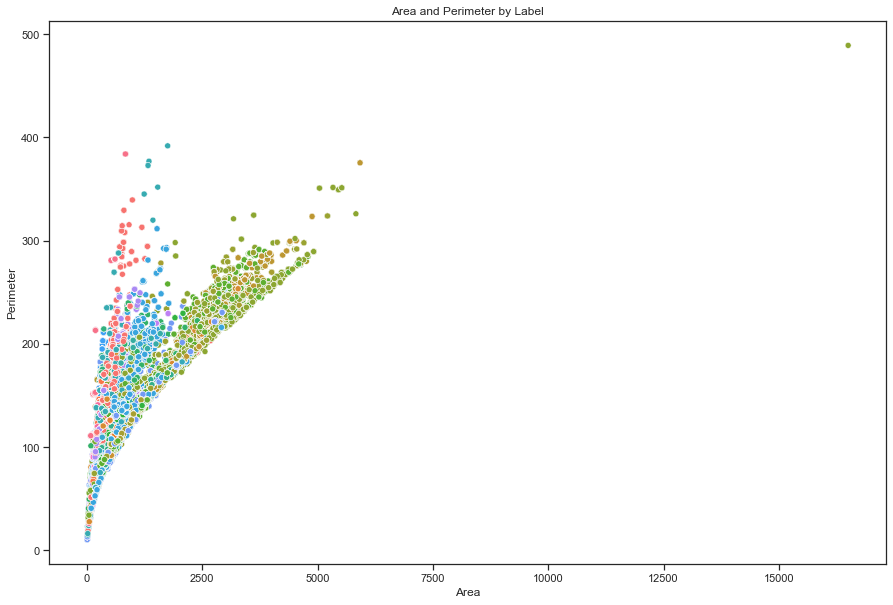

In [267]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("ticks")

sns.scatterplot('Area', 'Perimeter', data=df1, hue='labels',legend=False)
plt.title('Area and Perimeter by Label')
plt.show()

In [30]:
not_preds=['model_name','option','piece_id','piece_description','piece_category', 'pc_type','Num_Breaks',
 'Base_Size','Num_Breaks', 'Points',
 'Num_Sizes',
 'smallest',
 'largest',
 'pc_type',
 'labels', 'addp',
 'storage_area',
 'Type']
prog1['WELT'] = prog1['piece_category'].map(lambda x: 'WELT' in str(x))
y = pd.DataFrame(prog1['labels'])
X = prog1.drop(not_preds,axis=1)
not_dummy = ['type','asin','m_x','m_y','m_xy','half','dysp',
             'Num_Notch','Area','Perimeter','Internals']
dummy = []

for item in list(X.columns):
        if item not in not_dummy:
            dummy.append(item)
dummies = pd.get_dummies(X[dummy])
std = X[not_dummy]
preds = pd.concat([std,dummies,y],axis=1)

In [10]:
# PCA to decompose the data for visualizations
pca = PCA(n_components=3)
decomp=pca.fit_transform(X)
training = pd.DataFrame(decomp,columns=['pc1','pc2','pc3'])
sb_plot = pd.concat([training,y],axis=1)

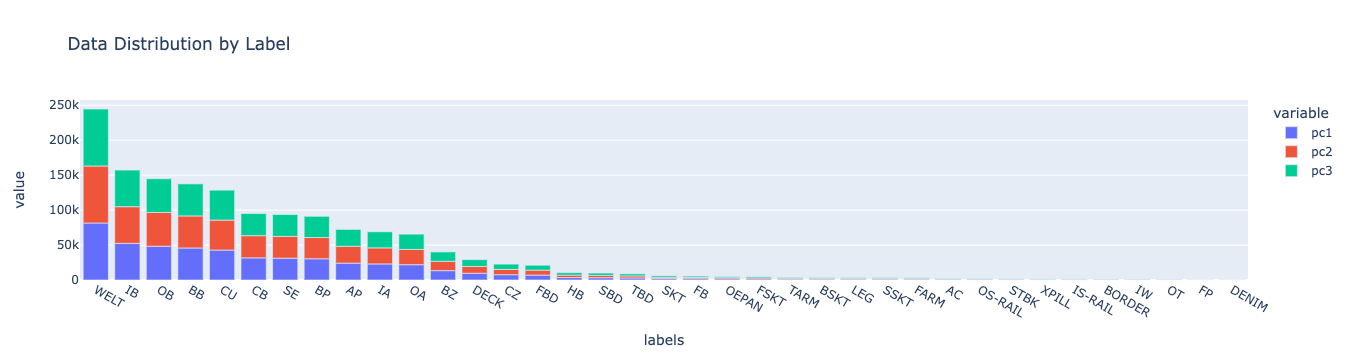

In [11]:
# Understanding distribution by label, still using decomposed data for speed.
label_count = sb_plot.groupby('labels').count().sort_values('pc1',ascending=False)
fig = px.bar(label_count,title='Data Distribution by Label')
fig.show()

In [97]:
fig = px.scatter_3d(sb_plot, x='pc1', y='pc2', z='pc3',opacity=.5,color='labels',width=1000,height=1000)
fig.show()

In [ ]:
# fig = px.scatter_3d(sb_plot[sb_plot['labels'] == 'WELT'], x='pc1', y='pc2', z='pc3',opacity=.5,color='pc3',width=1000,height=1000,title='Label = WELT')
# fig.show()

In [95]:
# fig = px.scatter_3d(sb_plot[sb_plot['labels'] == 'CU'], x='pc1', y='pc2', z='pc3',opacity=.5,color='pc3',width=1000,height=1000,)
# fig.show()

In [96]:
# fig = px.scatter_3d(sb_plot[sb_plot['labels'] == 'DECK'], x='pc1', y='pc2', z='pc3',opacity=.5,color='pc3',width=1000,height=1000)
# fig.show()

In [24]:
def decompose_and_plot(df,filename):
    """This function takes in the dataframe and returns a 3D plot. It uses sklearn incremental PCA to transform the predictors."""
    not_preds=['model_name','option','piece_id','piece_description','piece_category', 'pc_type','Num_Breaks',
     'Base_Size','Num_Breaks', 'Points','Num_Sizes','smallest','largest','pc_type','labels', 'addp','storage_area','Type']
    
    y = pd.DataFrame(df['labels'])
    X = df.drop(not_preds,axis=1)
    transformer = IncrementalPCA(n_components=3, batch_size=1000)
    X_transformed = transformer.fit_transform(X)
    eda_data = np.hstack((X_transformed,y))
    fig = px.scatter_3d(eda_data, x=0, y=1, z=2,opacity=.5,color=3,width=1000,height=1000)
    fig.write_html(filename+".html")
    return fig.show()

In [25]:
# decompose_and_plot(prog1,'prog1plot')

In [26]:
# decompose_and_plot(prog3)

In [27]:
# decompose_and_plot(prog4)

In [28]:
# decompose_and_plot(prog5)

In [29]:
# decompose_and_plot(prog6)

# Modeling
<hr>

**The modeling for this project will be multi-layered. The problem is structured as:**

1. Understand the types of pieces.
2. Understand how the pieces go together.

**I will use the output of the first model as the input for the second model.**

To begin with,I ran 6 baseline classifiers on the decomposed dataset to see initial results. KNN and XGBoost both performed well so I went on to tune the parameters. Code for running the classifiers is commented out below, but the results are available in the markdown table.

![structure image](./images/structure_2.png)

In [30]:
# models = vanilla_models(training,y)

| Classifier | Train Accuracy | Train Precision | Train Recall | Train F1 Score | Test Accuracy | Test Precision | Test Recall | Test F1 Score | Test Time |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 0.356 | 0.200 | 0.356 | 0.252 | 0.356 | 0.202 | 0.356 | 0.253 | 70.90 |
| KNearest Neighbors | 0.993 | 0.993 | 0.993 | 0.993 | 0.986 | 0.986 | 0.986 | 0.986 | 33.69 |
| Naive Bayes | 0.395 | 0.399 | 0.395 | 0.373 | 0.393 | 0.398 | 0.393 | 0.371 | 11.69 |
| Decision Tree | 0.529 | 0.517 | 0.529 | 0.486 | 0.528 | 0.517 | 0.528 | 0.485 | 14.52 |
| Random Forest | 0.538 | 0.517 | 0.538 | 0.492 | 0.537 | 0.515 | 0.537 | 0.491 | 17.35 |
| XGBoost | 0.976 | 0.976 | 0.976 | 0.976 | 0.969 | 0.969 | 0.969 | 0.969 | 302.54 |

After running the baseline classifiers and identifying which had the most promise, I explored XGBoost and KNN. Because KNN performed better and took 11%  of the training time that XGBoost did, I chose to explore it most heavily. I tuned the parameters for XGBoost a bit, but it showed no performance gains and only served to slow the algorithm down.<br>

To tune KNN, I chose to change the weight metric to 'distance' rather than the default 'uniform' because, for this data, points closest to the "neighborhood" will more purely exemplify the ideal characteristics and I want the model to weight them more heavily. I also iterated through adjusting the number of neighbors, and found that over 10 neighbors the performance decreased and the training time increased. This model suffers from minimal overfitting, which is excellent, though not unexpected.

Going into this project, I expected that if I was able to appropriately model this data, the performance would be great at this stage of the modeling. This is because I am purely modeling for inference - all of the information that I need to represent algorithmically exists in the dataset - it was merely a matter of transforming the data in the correct ways for KNN to digest. I expect the next stage of modeling will be more challenging to achieve quality results.

# Nearest Neighbors

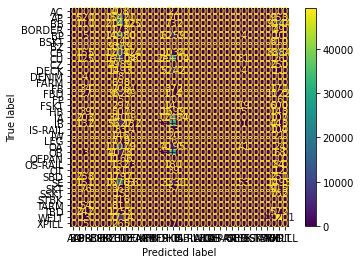

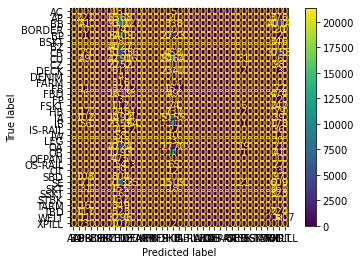

In [12]:
#knn run scaled model
knn = KNeighborsClassifier(n_neighbors=8,weights='distance')
neighbors = run_scaled_model(knn,training,y)

In [13]:
neighbors

({'classifier': KNeighborsClassifier(n_neighbors=8, weights='distance'),
  'train accuracy': 0.996,
  'train precision': 0.996,
  'train recall': 0.996,
  'train f1 score': 0.996,
  'test accuracy': 0.993,
  'test precision': 0.993,
  'test recall': 0.993,
  'test f1 score': 0.992,
  'test time': 41.03},
 'Top plot: Training Data',
 'Bottom Plot: Testing Data')

In [77]:
##knn cross validation
# stats = {'train accuracy': [],
#           'train precision': [],
#           'train recall': [],
#           'train f1 score': [],
#           'test accuracy': [],
#           'test precision': [],
#           'test recall': [],
#           'test f1 score': [],
#           'test time': []}
# for i in range(0,40):
#     neighbs = run_scaled_model(knn,training,y)
#     stats['train accuracy'].append(neighbs[0]['train accuracy'])
#     stats['train precision'].append(neighbs[0]['train precision'])
#     stats['train recall'].append(neighbs[0]['train recall'])
#     stats['train f1 score'].append(neighbs[0]['train f1 score'])
#     stats['test accuracy'].append(neighbs[0]['test accuracy'])
#     stats['test precision'].append(neighbs[0]['test precision'])
#     stats['test recall'].append(neighbs[0]['test recall'])
#     stats['test f1 score'].append(neighbs[0]['test f1 score'])
##saved results to data/knn_crossval.json

In [16]:
with open('./data/knn_crossval.json') as json_file:
    stats = json.load(json_file)
sns.set(rc={'figure.figsize':(20,8)})
fig,(acc,prec,recall) = plt.subplots(ncols=3,nrows=1)
acc.plot(stats['train accuracy'],label='Train')
acc.plot(stats['test accuracy'],label='Test')
acc.set_title('Accuracy')
acc.set_xlabel('crossvalidation split')
acc.set_ylabel('accuracy')
acc.set_yticks(np.linspace(.5,1.25,num=7))
prec.plot(stats['train precision'],label='Train')
prec.plot(stats['test precision'],label='Test')
prec.set_title('Precision')
prec.set_xlabel('crossvalidation split')
prec.set_ylabel('precision')
prec.set_yticks(np.linspace(.5,1.25,num=7))
recall.plot(stats['train recall'],label='Train')
recall.plot(stats['test recall'],label='Test')
recall.set_xlabel('crossvallidation split')
recall.set_ylabel('recall')
recall.set_title('Recall')
recall.set_yticks(np.linspace(.5,1.25,num=7))
acc.legend()
prec.legend()
recall.legend()
plt.suptitle('Cross Validation on Optimized KNN Model')
plt.show();

# Level II Modeling

These are the results of modeling before implementing NLP techniques on the model names. As you can see below, tree-based models performed well, with XGBoost as the performance leader. This is encouraging - it supports the idea that like objects will have like characteristics and we can use those characteristics to predict what the object is, correctly, 82% of the time. The predictors for thi 

| Classifier | Train Accuracy | Train Precision | Train Recall | Train F1 Score | Test Accuracy | Test Precision | Test Recall | Test F1 Score | Test Time |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 0.792 | 0.788 | 0.792 | 0.788 | 0.634 | 0.629 | 0.634 | 0.618 | 00.23 |
| KNearest Neighbors | 0.834 | 0.837 | 0.834 | 0.834 | 0.613 | 0.611 | 0.613 | 0.598 | 00.08 |
| Naive Bayes | 0.366 | 0.640 | 0.366 | 0.383 | 0.263 | 0.445 | 0.263 | 0.261 | 00.05 |
| Decision Tree | 0.751 | 0.768 | 0.751 | 0.748 | 0.675 | 0.685 | 0.675 | 0.654 | 00.04 |
| Random Forest | 0.456 | 0.702 | 0.456 | 0.380 | 0.412 | 0.500 | 0.412 | 0.319 | 00.05 |
| XGBoost | 1.000 | 1.000 | 1.000 | 1.000 | 0.823 | 0.826 | 0.823 | 0.822 | 2.17 |

In [4]:
df1 = pd.read_csv('program_1.csv',dtype=dtype_dict)
df1.drop('Unnamed: 0', axis=1,inplace=True)

In [5]:
df1.head()

model_name option piece_id piece_description piece_category type  asin  m_x  \
0     [kinqZ  KKqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
1     [kinqZ  KKqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
2     [kinqZ  KKqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
3     [kinqZ  KVqN[    YFXQI         RECTANGLE          DWELT    0     4    0   
4     [kinqZ  KVqN[    YFXQI         RECTANGLE          DWELT    0     4    0   

   m_y  m_xy  ...  Perimeter  Internals  Points Num_Sizes Num_Breaks  \
0    0     0  ...     112.59          3       4         1          0   
1    0     0  ...     112.50          3       4         1          0   
2    0     0  ...     113.00          3       4         1          0   
3    0     0  ...     112.59          3       4         1          0   
4    0     0  ...     112.50          3       4         1          0   

   Base_Size  smallest  largest  pc_type  labels  
0          1         1        1      0.0    WELT  
1          1         1        1      0.0    WELT  
2          1         1        1      0.0    WELT  
3          1         1        1      0.0    WELT  
4          1         1        1      0.0    WELT  

[5 rows x 27 columns]

In [6]:
#list to hold dataframe, one df per model_name
models = []
#list of model_name strings
diff_models = list(df1.model_name.unique())
model_names = pd.Series(diff_models)
labels = list(df1.labels.unique())
#create dataframes by model_name
for model in diff_models:
    models.append(df1[df1['model_name']==model])

In [7]:
def get_str_encoding(strtoencode):
    #create variables
    firstalpha = list(string.ascii_lowercase + string.ascii_uppercase+string.digits+string.punctuation +' ')
    alphanum = [i for i in firstalpha if i != ('\\')]
    top = sorted(alphanum)
    bottom = sorted(alphanum,reverse=True)
    encodings = {top[i]:bottom[i] for i in range(len(top))}
    #process string
    string_list = list(str(strtoencode))
    new_list = [encodings[item] for item in string_list]
    new_string = ''.join(new_list)
    return new_string

In [8]:
decoded = [get_str_encoding(i) for i in diff_models]

### Feature Engineering: piece counts

In [9]:
def model_pc_dict(df):
    count_parts = df.groupby('labels').count()
    part_qty = count_parts.model_name.values
    part_names = count_parts.index
    part_dict  = {part_names[i]:part_qty[i] for i in range(len(part_names))}
    return part_dict
def full_dict(modelpartdict):
    full = {labels[i]:0 for i in range(len(labels))}
    for item in full.keys():
        if item in modelpartdict:
            full[item]+= modelpartdict[item]
    return full

In [10]:
part_dicts = [model_pc_dict(i) for i in models]

In [11]:
part_dicts[0]

{'FB': 18, 'HB': 6, 'IS-RAIL': 9, 'OB': 9, 'OS-RAIL': 9, 'WELT': 32}

In [12]:
df_dicts = [full_dict(i) for i in part_dicts]
df = pd.DataFrame(df_dicts)

In [13]:
df.columns

Index(['WELT', 'CB', 'SBD', 'SKT', 'AP', 'XPILL', 'DECK', 'IW', 'BP', 'IB',
       'HB', 'LEG', 'OB', 'OA', 'FB', 'TBD', 'IA', 'FP', 'IS-RAIL', 'OS-RAIL',
       'BB', 'AC', 'DENIM', 'OT', 'SE', 'CZ', 'CU', 'BZ', 'FBD', 'FSKT',
       'BSKT', 'STBK', 'SSKT', 'OEPAN', 'TARM', 'FARM', 'BORDER'],
      dtype='object')

In [14]:
df = pd.concat([model_names,df],axis=1)

In [15]:
cols = df.columns
less = cols[1:len(cols)].insert(0,'model_name')
df.columns = less

In [16]:
df['real_names'] = decoded

### Feature Engineering: options

In [17]:
def count_options(df):
    count_opts = df.groupby('option').mean()
    num_opts = len(count_opts.index)
    return num_opts

In [18]:
df['num_options'] = [count_options(i) for i in models]

In [19]:
def avg_area_by_opt(df):
    count_opts = df.groupby('option').mean()
    part_qty = count_opts.Area.values
    part_names = count_opts.index
    num_opts = len(count_opts.index)
    part_dict  = {part_names[i]:part_qty[i] for i in range(len(part_names))}
    return part_dict

In [20]:
unique_opts = list(df1['option'].unique())
len(unique_opts)
opt_dict = [avg_area_by_opt(i) for i in models]


In [21]:
def full_opt_dict(modelpartdict):
    full = {unique_opts[i]:0 for i in range(len(unique_opts))}
    for item in full.keys():
        if item in modelpartdict:
            full[item]+= modelpartdict[item]
    return full
complete_optdict = [full_opt_dict(i) for i in opt_dict]
opt_df = pd.DataFrame(complete_optdict)
options = pd.concat([model_names,opt_df],axis=1)
cols = options.columns
less = cols[1:len(cols)].insert(0,'model_name')
options.columns = less
options.head()

model_name    KKqN[    KVqN[  N[qKK  N[qKV         0=0  ]qTej  ]qTejF  [qej  \
0     [kinqZ  718.273  718.273    0.0    0.0  781.843913    0.0     0.0   0.0   
1    [kinqZU  718.273  718.273    0.0    0.0  919.353636    0.0     0.0   0.0   
2     [kinqR  743.424  743.424    0.0    0.0  801.605217    0.0     0.0   0.0   
3    [kinqRU  743.424  743.424    0.0    0.0  958.763636    0.0     0.0   0.0   
4     [kinqL  642.673  642.673    0.0    0.0  698.496087    0.0     0.0   0.0   

   Zqej  ...  KVqYN[  ]N[  [N[  ZN[  kMZqJX  [Q]ZR[  GTODQ  mMZqT[  HOTVH]  \
0   0.0  ...     0.0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0   
1   0.0  ...     0.0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0   
2   0.0  ...     0.0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0   
3   0.0  ...     0.0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0   
4   0.0  ...     0.0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0   

   ONFXQI  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

[5 rows x 510 columns]

### Feature Engineering: joining new features

In [22]:
options.head()

model_name    KKqN[    KVqN[  N[qKK  N[qKV         0=0  ]qTej  ]qTejF  [qej  \
0     [kinqZ  718.273  718.273    0.0    0.0  781.843913    0.0     0.0   0.0   
1    [kinqZU  718.273  718.273    0.0    0.0  919.353636    0.0     0.0   0.0   
2     [kinqR  743.424  743.424    0.0    0.0  801.605217    0.0     0.0   0.0   
3    [kinqRU  743.424  743.424    0.0    0.0  958.763636    0.0     0.0   0.0   
4     [kinqL  642.673  642.673    0.0    0.0  698.496087    0.0     0.0   0.0   

   Zqej  ...  KVqYN[  ]N[  [N[  ZN[  kMZqJX  [Q]ZR[  GTODQ  mMZqT[  HOTVH]  \
0   0.0  ...     0.0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0   
1   0.0  ...     0.0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0   
2   0.0  ...     0.0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0   
3   0.0  ...     0.0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0   
4   0.0  ...     0.0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0   

   ONFXQI  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

[5 rows x 510 columns]

In [23]:
df.head()

model_name  WELT  CB  SBD  SKT  AP  XPILL  DECK  IW  BP  ...  FSKT  BSKT  \
0     [kinqZ    32   0    0    0   0      0     0   0   0  ...     0     0   
1    [kinqZU    32   0    0    0   0      0     0   0   0  ...     0     0   
2     [kinqR    32   0    0    0   0      0     0   0   0  ...     0     0   
3    [kinqRU    32   0    0    0   0      0     0   0   0  ...     0     0   
4     [kinqL    32   0    0    0   0      0     0   0   0  ...     0     0   

   STBK  SSKT  OEPAN  TARM  FARM  BORDER  real_names  num_options  
0     0     0      0     0     0       0      B350-C            5  
1     0     0      0     0     0       0     B350-CH            5  
2     0     0      0     0     0       0      B350-K            5  
3     0     0      0     0     0       0     B350-KH            5  
4     0     0      0     0     0       0      B350-Q            5  

[5 rows x 40 columns]

In [24]:
# df.set_index('model_name',inplace=True)
# options.set_index('model_name',inplace=True)

In [25]:
full_df = df.merge(options,left_index=True,right_index=True)

In [26]:
full_df.reset_index(inplace=True)

In [27]:
full_df.head()

index model_name_x  WELT  CB  SBD  SKT  AP  XPILL  DECK  IW  ...  KVqYN[  \
0      0       [kinqZ    32   0    0    0   0      0     0   0  ...     0.0   
1      1      [kinqZU    32   0    0    0   0      0     0   0  ...     0.0   
2      2       [kinqR    32   0    0    0   0      0     0   0  ...     0.0   
3      3      [kinqRU    32   0    0    0   0      0     0   0  ...     0.0   
4      4       [kinqL    32   0    0    0   0      0     0   0  ...     0.0   

   ]N[  [N[  ZN[  kMZqJX  [Q]ZR[  GTODQ  mMZqT[  HOTVH]  ONFXQI  
0  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0     0.0  
1  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0     0.0  
2  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0     0.0  
3  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0     0.0  
4  0.0  0.0  0.0     0.0     0.0    0.0     0.0     0.0     0.0  

[5 rows x 551 columns]

# Unsupervised Learning: Exploring performance before training

In [28]:
#test agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
X = df.drop(['model_name','real_names'],axis=1)
agg_clust = AgglomerativeClustering(n_clusters=37)
assigned_clust = agg_clust.fit_predict(X)

In [29]:
assigned_clust

array([15,  7, 15, ...,  6,  6, 18])

In [30]:
df['clustering'] = assigned_clust

In [31]:
df.head()

model_name  WELT  CB  SBD  SKT  AP  XPILL  DECK  IW  BP  ...  BSKT  STBK  \
0     [kinqZ    32   0    0    0   0      0     0   0   0  ...     0     0   
1    [kinqZU    32   0    0    0   0      0     0   0   0  ...     0     0   
2     [kinqR    32   0    0    0   0      0     0   0   0  ...     0     0   
3    [kinqRU    32   0    0    0   0      0     0   0   0  ...     0     0   
4     [kinqL    32   0    0    0   0      0     0   0   0  ...     0     0   

   SSKT  OEPAN  TARM  FARM  BORDER  real_names  num_options  clustering  
0     0      0     0     0       0      B350-C            5          15  
1     0      0     0     0       0     B350-CH            5           7  
2     0      0     0     0       0      B350-K            5          15  
3     0      0     0     0       0     B350-KH            5           7  
4     0      0     0     0       0      B350-Q            5          15  

[5 rows x 41 columns]

In [32]:
df[df['clustering']==26]

model_name  WELT  CB  SBD  SKT  AP  XPILL  DECK  IW  BP  ...  BSKT  STBK  \
989      GnmZU    66   9    0    0   0      0     0   0   0  ...     0     0   
990      GnmWU    60  15    0    0   0      0     0   0   0  ...     0     0   
991      GnmRU    66  15    0    0   0      0     0   0   0  ...     0     0   
992      GnmLU    66  15    0    0   0      0     0   0   0  ...     0     0   

     SSKT  OEPAN  TARM  FARM  BORDER  real_names  num_options  clustering  
989     0      0     0     0       0       V01CH           33          26  
990     0      0     0     0       0       V01FH           30          26  
991     0      0     0     0       0       V01KH           33          26  
992     0      0     0     0       0       V01QH           35          26  

[4 rows x 41 columns]

In [33]:
type_models = {'SRD':['ottoman','round'],
            'SOV':['ottoman','oval'],
            'SSQ':['ottoman','square'],
            'SRC':['ottoman','rectangle'],
            'RCS':['sofa','corner'],
            'LCS':['sofa','corner'],
            'CH':['chair','still'],
            'SG':['chair','swivel_glide'],
            'SW':['chair','swivel'],
            'SB':['bench','upholstered'],
            'OT':['ottoman','std'],
            'OTTO':['ottoman','std'],
            'CC':['chair','corner'],
            '-K':['bed','king'],
            '-Q':['bed','queen'],
            '-C':['chair','upholstered'],
            '-T':['bed','twin'],
            '-O':['ottoman','std'],
            'KH':['bed','king'],
            'QH':['bed','queen'],
            'LAL':['loveseat','leftarm'],
            'RAL':['loveseat','rightarm'],
            '-1SS':['sofa','benchsleeper'],
            '-MSS':['sofa','midsleeper'],
            '-2SS':['sofa','2sleeper'],
            '-SS':['sofa','3sleeper'],
            '-S':['sofa','3over3'],
            'LAH':['chaise','leftarm'],
            'RAH':['chaise','rightarm'],
            'LAS':['sofa','leftarm'],
            'RAS':['sofa','rightarm'],
            'LG':['lounge','leftarm'],
            'RG':['lounge','rightarm'],
            'ALS':['loveseat','armless'],
            '-AC':['chair','armless'],
            '1ES':['sofa','extended'],
            '2ES':['sofa','extended'],
            'ES':['sofa','extended'],
            '-MS':['sofa','mid'],
            '-2S':['sofa','2over2'],
              }

In [34]:
def model_label(modelnamestr):
    label = None
    for key in type_models:
        if key in modelnamestr:
            label = type_models[key][0]
    return label

def subclass(modelnamestr):
    subclass = None
    for key in type_models:
        if key in modelnamestr:
            subclass = type_models[key][1]
    return subclass

In [35]:
full_df['labels'] = full_df['real_names'].map(lambda x: model_label(x))

In [36]:
full_df['subclass'] = full_df['real_names'].map(lambda x: subclass(x))

In [37]:
full_df.labels.isna().sum()

460

In [38]:
full_df.head()

index model_name_x  WELT  CB  SBD  SKT  AP  XPILL  DECK  IW  ...  [N[  ZN[  \
0      0       [kinqZ    32   0    0    0   0      0     0   0  ...  0.0  0.0   
1      1      [kinqZU    32   0    0    0   0      0     0   0  ...  0.0  0.0   
2      2       [kinqR    32   0    0    0   0      0     0   0  ...  0.0  0.0   
3      3      [kinqRU    32   0    0    0   0      0     0   0  ...  0.0  0.0   
4      4       [kinqL    32   0    0    0   0      0     0   0  ...  0.0  0.0   

   kMZqJX  [Q]ZR[  GTODQ  mMZqT[  HOTVH]  ONFXQI  labels     subclass  
0     0.0     0.0    0.0     0.0     0.0     0.0   chair  upholstered  
1     0.0     0.0    0.0     0.0     0.0     0.0   chair  upholstered  
2     0.0     0.0    0.0     0.0     0.0     0.0     bed         king  
3     0.0     0.0    0.0     0.0     0.0     0.0     bed         king  
4     0.0     0.0    0.0     0.0     0.0     0.0     bed        queen  

[5 rows x 553 columns]

In [39]:
label_df = full_df[full_df['labels'].isna()==False]
X = label_df.drop(['labels','real_names','model_name_x','model_name_y','subclass'],axis=1)
y=label_df['labels']

In [40]:
X.columns = X.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [41]:
models = vanilla_models(X,y)

Logistic Regression model complete.
Nearest Neighbors model complete.
Naive Bayes model complete.
Decision Tree model complete.
Random Forest model complete.
[16:04:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost model complete.


In [42]:
models

classifier  train accuracy  train precision  train recall  \
0  Logistic Regression           0.792            0.788         0.792   
1    Nearest Neighbors           0.834            0.837         0.834   
2          Naive Bayes           0.366            0.640         0.366   
3        Decision Tree           0.751            0.768         0.751   
4        Random Forest           0.456            0.702         0.456   
5              XGBoost           1.000            1.000         1.000   

   train f1 score  test accuracy  test precision  test recall  test f1 score  \
0           0.788          0.634           0.629        0.634          0.618   
1           0.834          0.613           0.611        0.613          0.598   
2           0.383          0.263           0.445        0.263          0.261   
3           0.748          0.675           0.685        0.675          0.654   
4           0.380          0.412           0.500        0.412          0.319   
5           1.000          0.823           0.826        0.823          0.822   

   test time  
0       0.23  
1       0.08  
2       0.05  
3       0.04  
4       0.05  
5       2.17

In [43]:
# PCA to decompose the data for visualizations
pca = PCA(n_components=3)
decomp=pca.fit_transform(X)
training = pd.DataFrame(decomp,columns=['pc1','pc2','pc3'])
sb_plot = pd.concat([training,y],axis=1)

In [44]:
sb_plot.dropna(inplace=True)

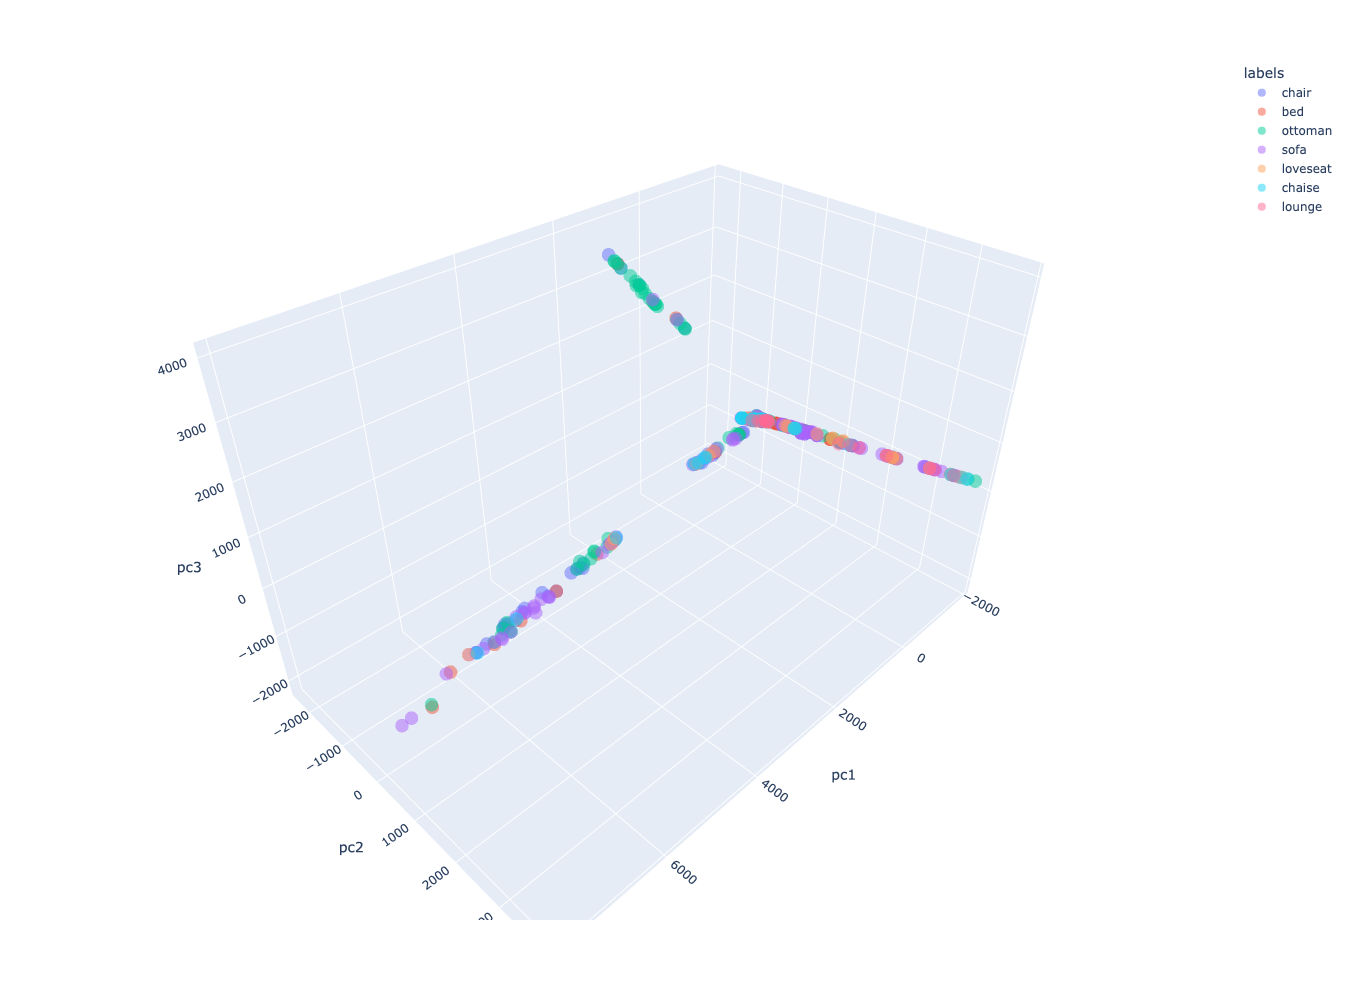

In [45]:
fig = px.scatter_3d(sb_plot, x='pc1', y='pc2', z='pc3',opacity=.5,color='labels',width=1000,height=1000)
fig.show()

In [46]:
#now trying to predict the subclass using the class as a feature
lil_x = label_df.drop(['real_names','model_name_x','model_name_y','subclass'],axis=1)
dummied = pd.get_dummies(label_df.labels,drop_first=True)
X = pd.concat([lil_x,dummied],axis=1)
X.drop('labels',axis=1,inplace=True)
y=label_df['subclass']
X.columns = X.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [47]:
models = vanilla_models(X,y)

Logistic Regression model complete.
Nearest Neighbors model complete.
Naive Bayes model complete.
Decision Tree model complete.
Random Forest model complete.
[16:04:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost model complete.


In [48]:
models

classifier  train accuracy  train precision  train recall  \
0  Logistic Regression           0.627            0.650         0.627   
1    Nearest Neighbors           0.751            0.766         0.751   
2          Naive Bayes           0.528            0.740         0.528   
3        Decision Tree           0.668            0.618         0.668   
4        Random Forest           0.440            0.515         0.440   
5              XGBoost           0.998            0.998         0.998   

   train f1 score  test accuracy  test precision  test recall  test f1 score  \
0           0.619          0.374           0.403        0.374          0.358   
1           0.748          0.461           0.496        0.461          0.451   
2           0.508          0.416           0.576        0.416          0.394   
3           0.612          0.576           0.564        0.576          0.526   
4           0.386          0.300           0.355        0.300          0.250   
5           0.998          0.778           0.790        0.778          0.776   

   test time  
0       0.43  
1       0.11  
2       0.10  
3       0.04  
4       0.05  
5       4.41

In [49]:
# PCA to decompose the data for visualizations
pca = PCA(n_components=3)
decomp=pca.fit_transform(X)
training = pd.DataFrame(decomp,columns=['pc1','pc2','pc3'])
sb_plot = pd.concat([training,y],axis=1)

In [50]:
sb_plot.dropna(inplace=True)

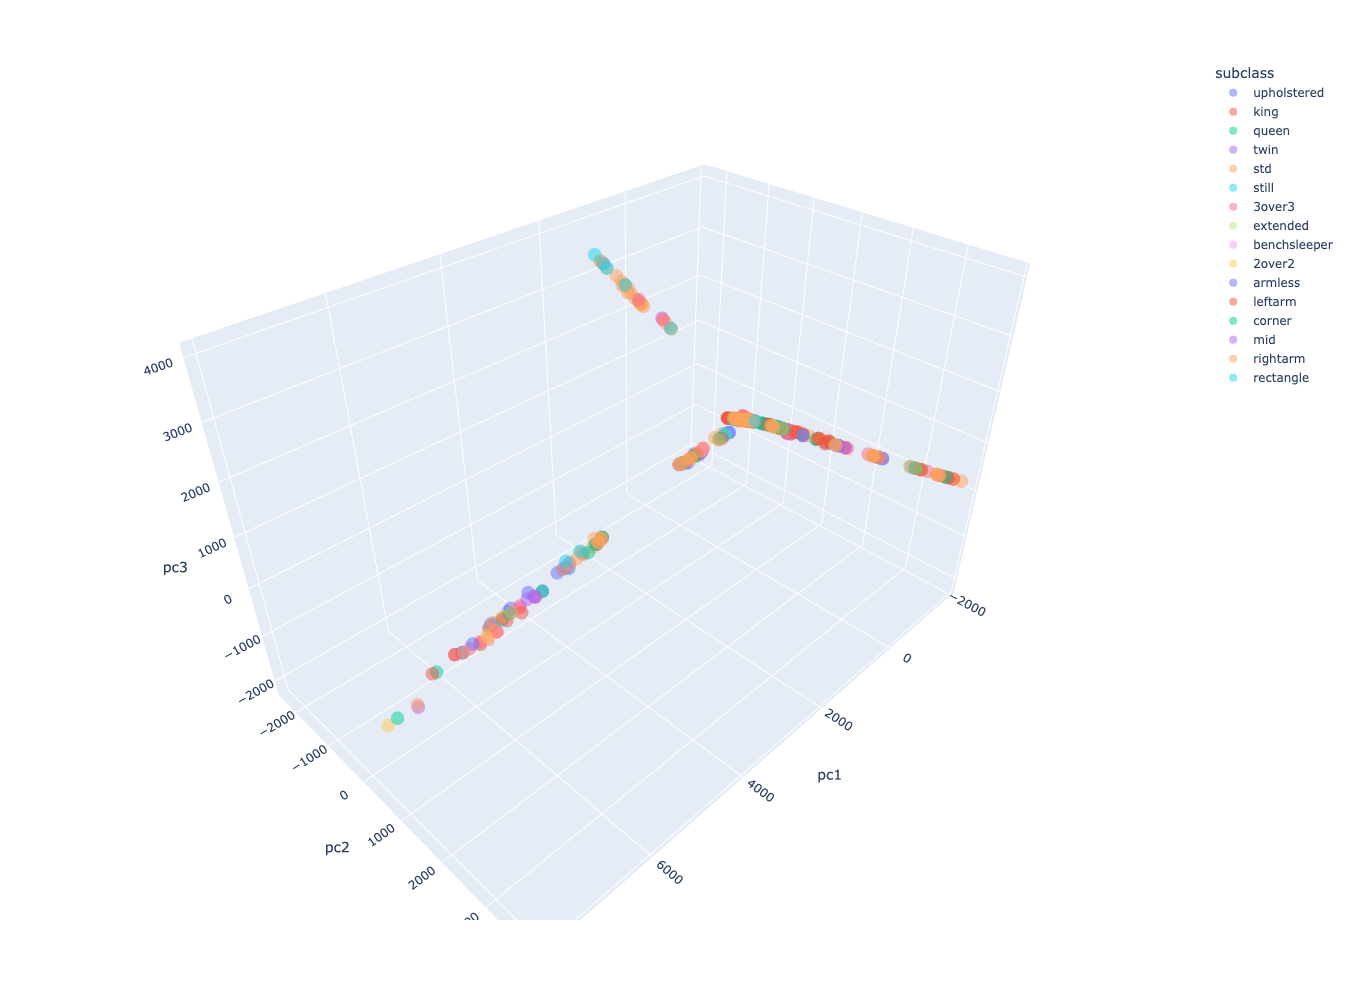

In [52]:
fig = px.scatter_3d(sb_plot, x='pc1', y='pc2', z='pc3',opacity=.5,color='subclass',width=1000,height=1000)
fig.show()

In [53]:
from label_ngram_preprocessing import generate_ngrams, freq_dist, add_ngram_cols

In [54]:
cats = list(set(full_df['model_name_x']))
#create ngrams for all categories
len_2_long = [generate_ngrams(x,2) for x in cats]
len_3_long = [generate_ngrams(x,3) for x in cats]
len_4_long = [generate_ngrams(x,4) for x in cats]
#flatten lists
len_2 = [item for sublist in len_2_long for item in sublist]
len_3 = [item for sublist in len_3_long for item in sublist]
len_4 = [item for sublist in len_4_long for item in sublist]
#freq distributions of ngrams
dict_2 = freq_dist(len_2)
dict_3 = freq_dist(len_3)
dict_4 = freq_dist(len_4)
#write dictionaries to json
with open('model2_ngram_2.json', 'w') as fp:
    json.dump(dict_2, fp)
with open('model2_ngram_3.json', 'w') as fp:
    json.dump(dict_3, fp)
with open('model2_ngram_4.json', 'w') as fp:
    json.dump(dict_4, fp)

this_dir = os.listdir('./')
ngrams = []
for item in this_dir:
    if 'model2' in item:
        ngrams.append(item)

labels_ngrams = add_ngram_cols(full_df,'model2')

# programs = [prog_1,prog_2,prog_3,prog_4,prog_5,prog_6]
# program_labels = ['prog_1','prog_2','prog_3','prog_4','prog_5','prog_6']
# for ind,program in enumerate(programs):
#     program.to_csv(program_labels[ind]+'.csv')

2grams mapped.
3grams mapped.
4grams mapped.
47 58 45
ngram 2 dataframe made.
ngram 3 dataframe made.
dataframe with ngrams created successfully.


In [55]:
# labels_ngrams.drop('model_name_y',axis=1,inplace=True)
labels_ngrams.dropna(inplace=True)

In [56]:
y = labels_ngrams['labels']
y2 = labels_ngrams['subclass']

In [65]:
X = labels_ngrams.drop(['model_name_x','model_name_y','labels','subclass','real_names','en'],axis=1)
X.columns = X.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [1]:

# def countX(lst, x):
#     return (x,lst.count(x))
# pred_counts = [countX(list(X.columns),y) for y in list(X.columns)]
# for count in pred_counts:
#     if count[1] != 1:
#         print(count)
# list(X.columns)

In [67]:
models = vanilla_models(X,y)

Logistic Regression model complete.
Nearest Neighbors model complete.
Naive Bayes model complete.
Decision Tree model complete.
Random Forest model complete.
[16:20:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost model complete.


In [68]:
models

classifier  train accuracy  train precision  train recall  \
0  Logistic Regression           0.800            0.799         0.800   
1    Nearest Neighbors           0.818            0.825         0.818   
2          Naive Bayes           0.770            0.815         0.770   
3        Decision Tree           0.800            0.815         0.800   
4        Random Forest           0.419            0.588         0.419   
5              XGBoost           1.000            1.000         1.000   

   train f1 score  test accuracy  test precision  test recall  test f1 score  \
0           0.797          0.638           0.633        0.638          0.622   
1           0.819          0.642           0.667        0.642          0.637   
2           0.754          0.658           0.706        0.658          0.639   
3           0.784          0.753           0.793        0.753          0.734   
4           0.321          0.350           0.333        0.350          0.232   
5           1.000          0.992           0.992        0.992          0.992   

   test time  
0       0.30  
1       0.14  
2       0.10  
3       0.08  
4       0.09  
5       1.83

[16:20:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


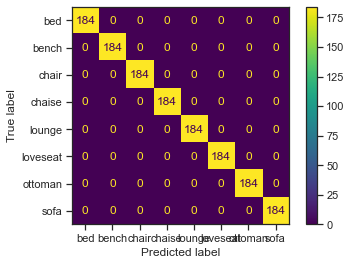

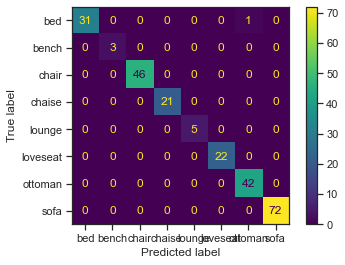

In [69]:
clf = XGBClassifier()
xgb = run_model(clf,X,y)

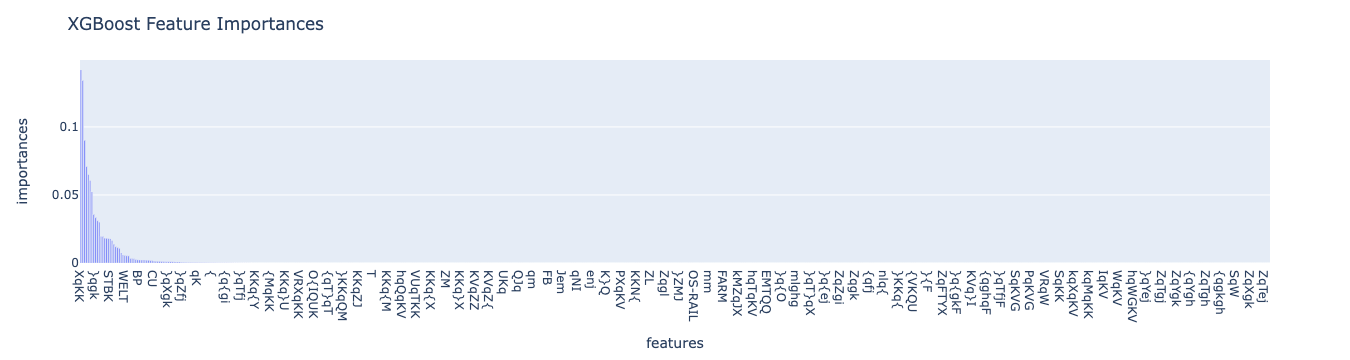

In [70]:
plot_importances(xgb,X)

# Summary

Using an XGBoost classifier on the second level of modeling and implementing NLP techniques correctly classifies objects 96%-99% of the time, depending on the collection. Some of the piece names that were generated in the first level of modeling serve as important predictors in the second level. I'm pleased with and excited about this performance, and am anxious to begin the next step of development. 